# MMDS Final Project 

This is my final project for Mining Massive Datasets (MMDS). Taught by Professor Gustavo Sandoval at New York University, Spring 2021.

# Introduction

The main purpose of this notebook is to explore a dataset and use Machine Learning techniques to make predictions. Different ML models are analyzed to come to a conclusion about the best model that can be used in this context.

# Problem Statement

>Say you're in the vehicle insurance business. At a time where data is everything, and if you obtain data about vehicle owners, what can you do with the data?
> - **Can you predict** whether a vehicle owner will eventually file an insurance claim?
> - If they do, **can you predict** how much money would be file for insurance?
> - If you can, **what are the most important pieces of information to predict them?**

## Hypotheses

For a human being untrained by Machine Learning models, there could be a few indicators that might sensibly answer the question we've posed. Let's say a vehicle owner has two teenage children that drive the car. It'd be sensible enough to predict that this vehicle owner has a greater probability when it comes to being in crash and filing an insurance claim because he/she has relatively unexperienced children driving the car. This would be one of our hypotheses. 

What about other glaring attributes? How old is the vehicle? How old is the driver? Both of these questions might have similar answers to the question: the risk of a car crash and the possibility of the owner experiencing an accident can normally increase with the increase in age -- whether it's the car's age or the driver's age. 

# Data

At this point we should take a look at what the data looks like. This dataset was obtained from Kaggle, a website that hosts numerous datasets such as this. 

This dataset contains 8161 observations of 26 variables (1 index, 2 response, and 23 predictor variables). 
Each observation (row) represents a set of attributes of an insurance company customer that is related to his/her socio-demographic profile and the insured vehicle.

Let's first import some libraries that will help us explore this data.

In [675]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import clear_output
import IPython.core.display as di
di.display_html("""
$('<style>.code_cell { margin-bottom: 25px !important;}</style>').appendTo('head');
""", raw=True)

$('').appendTo('head');

In [676]:
def read_dataset(filename):
    df_original = pd.read_csv(filename)
    df = pd.read_csv(filename)
    return df 
filename = 'car_insurance_claim.csv'
df = read_dataset(filename)
df_original = read_dataset(filename)

In [677]:
df.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

These are all the columns provided to us by the dataset. Their meanings have been listed below:

1. `ID` : A unique integer given to each data point (rows) 
2. `KIDSDRIV` : Number of teenagers that drive the car 
3. `BIRTH`: Driver's birthdate 
4. `AGE` : Driver's age 
5. `HOMEKIDS` : The number of kids at home 
6. `YOJ` : Number of years the driver has held a job 
7. `INCOME`: Income of driver 
8. `PARENT1` : Is the driver a single parent?
9. `HOMEVAL` : Valuation of the driver's home  
10. `MSTATUS` : Driver's marital status 
11. `GENDER` : Driver's gender 
12. `EDUCATION` : Driver's education 
13. `OCCUPATION` : Driver's occupation 
14. `TRAVTIME` : Distance to Work 
15. `CAR_USE`: Vehicle use 
16. `BLUEBOOK` : Value of Vehicle 
17. `TIF`: Time in Force 
18. `CAR_TYPE`: Type of Car 
19. `RED_CAR` : Is the car red in color? (Urban legend says that red cars are more risky!)
20. `OLDCLAIM` : Total value of old claims (past 5 years)
21. `CLM_FREQ` : Number of claims in the past 5 years  
22. `REVOKED` : License Revoked 
23. `MVR_PTS` : Motor Vehicle Record Points (# of tickets the driver has recieved)
24. `CLAIM_FLAG` : Was the car in a crash? (1 = Yes, 0 = No)
25. `CLM_AMT` : If the car was in a crash, what was the insurance claim amount?
26. `CAR_AGE` : Vehicle age 
27. `URBANCITY` : Home/Work Area

## Data Exploration

In [678]:
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


These are the top 5 rows of the dataset. Let's look for a few factors that might influence our results.

### Missing Values

<AxesSubplot:>

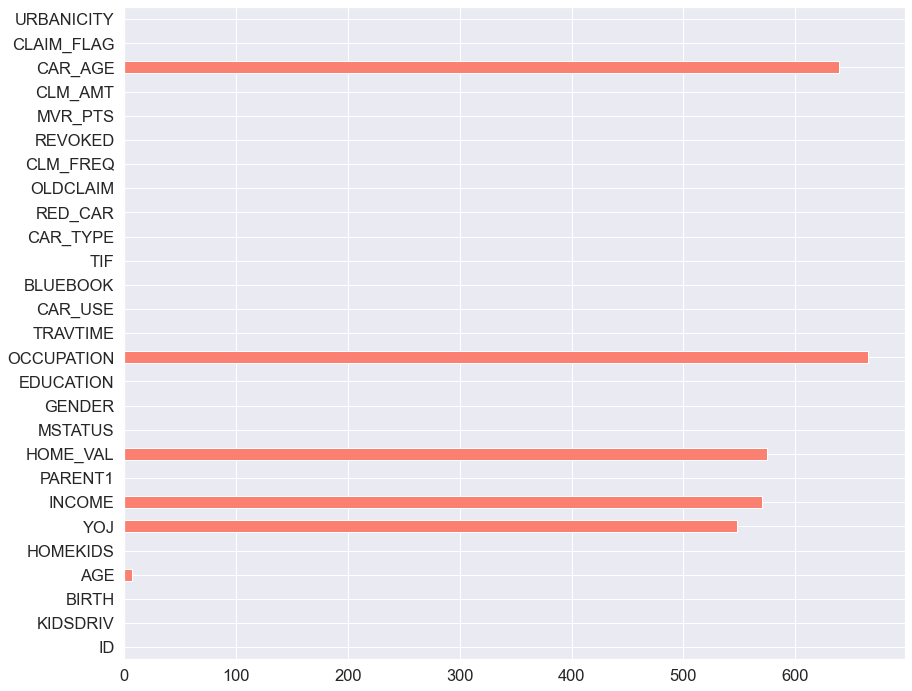

In [679]:
# plot bar chart for each column and the number of missing values
df.isnull().sum().plot(kind = 'barh', color = ['salmon'], figsize = (14,12))

The plot suggests that there are missing values in the following columns:

1. `Age` 
2. `YOJ`
3. `Income` 
4. `Home_Val`
5. `Occupation`
6. `Car_Age`

These missing entries will be dealt with at a later stage.

### Data Distributions for some Continuous Variables

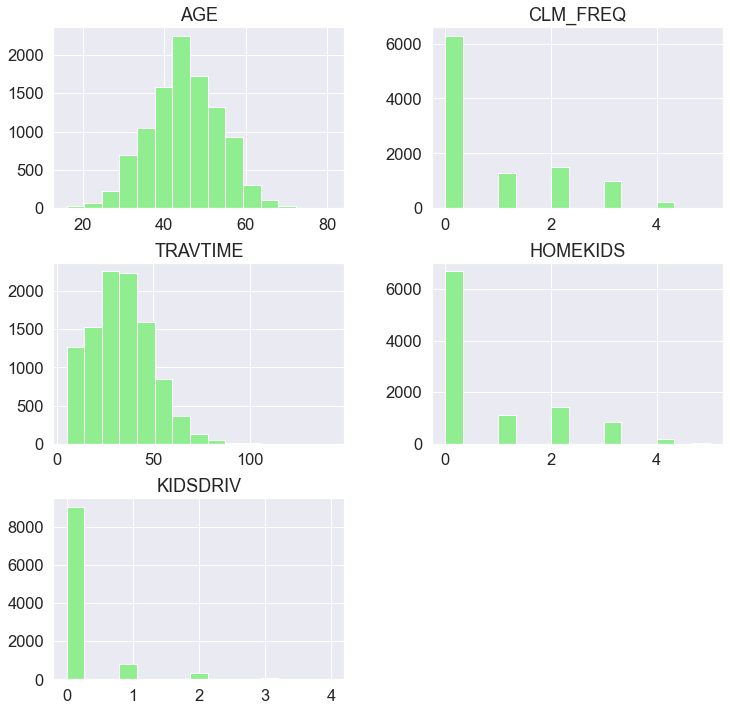

In [680]:
#plot histogram for contiuous variable distributions
hist = df.hist(column = ['AGE', 'CLM_FREQ', 'TRAVTIME', 'HOMEKIDS', 'KIDSDRIV', 'CLM_AMT'], 
               color = ['lightgreen'], 
               figsize = (12,12), 
               bins = 15)

### Data Distributions for some Categorical Variables

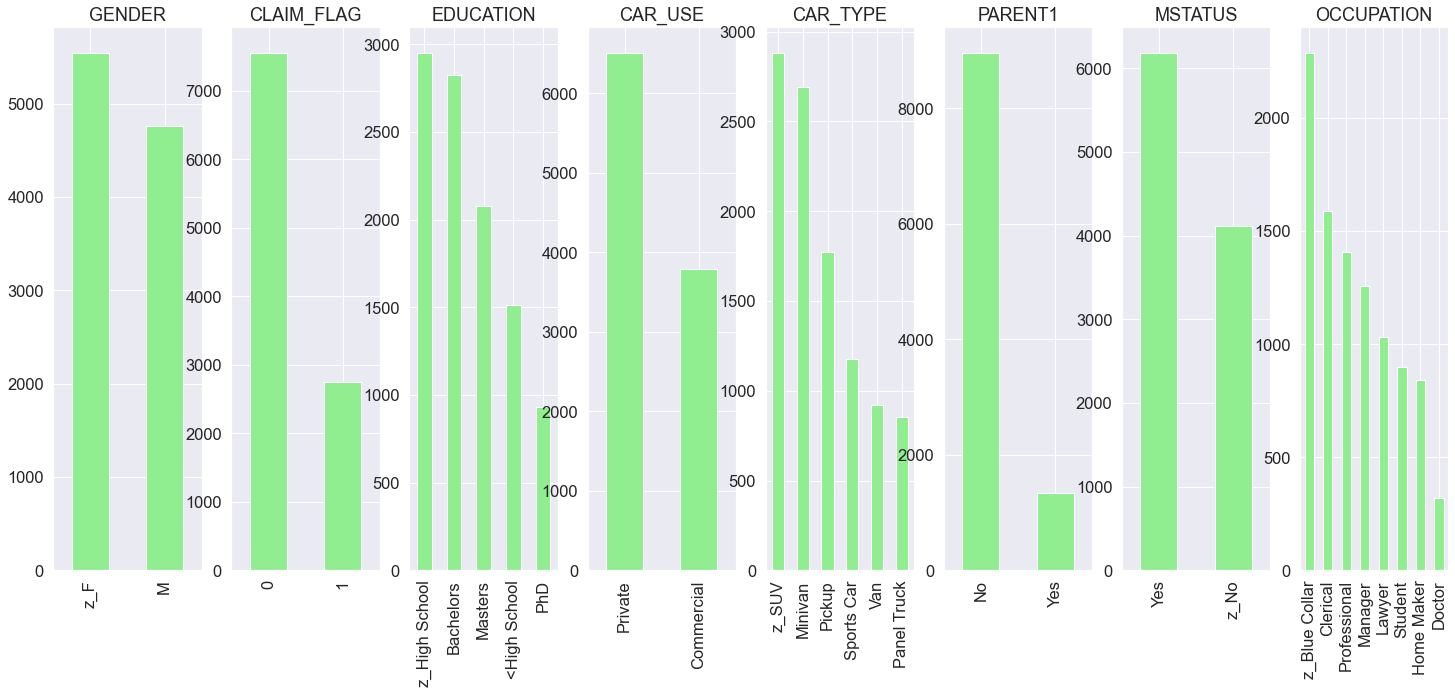

In [681]:
categorical_features = ["GENDER", "CLAIM_FLAG", "EDUCATION", "CAR_USE", "CAR_TYPE", "PARENT1", "MSTATUS", "OCCUPATION"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(figsize = (25,10), 
                                                kind = "bar",
                                                color = ['lightgreen'],
                                                ax=ax[i]).set_title(categorical_feature)
        

### Balance and Oversampling 

In [682]:
df["CLAIM_FLAG"].value_counts()

0    7556
1    2746
Name: CLAIM_FLAG, dtype: int64

<AxesSubplot:>

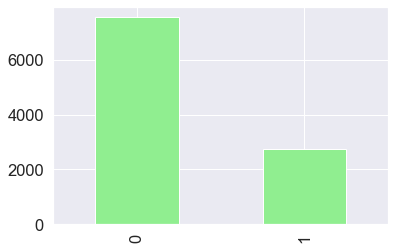

In [683]:
df["CLAIM_FLAG"].value_counts().plot(kind = 'bar', color = ['lightgreen'])

We can see in the chart above that there is a massive imbalance when it comes to the two flags. We have 7064 instances of the `0` (insurance not filed) class and 2566 instances of the `1` (insurance filed) class.

In order to overcome this imbalance (which might lead to an unwanted bias towards the `0` class in our machine learning algorithm), we will be using the **`SMOTE` (Synthetic Minority Oversampling Technique)**, which is used to handle imbalanced datasets by creating new synthetic points. This artificial creation of under-represented classes has been widely used since 2002 when the SMOTE paper was released.

# Data Pre-Processing

## Data Cleansing

We'll first convert all values contaning the `$` sign into floats

In [684]:
def clean_features(df, features):
    for feature in features:
        # strip the '$' sign
        df[feature] = df[feature].str.strip('$')
        # remove the ',' sign
        df[feature] = df[feature].str.replace(',', '')
        # convert to float
        df[feature] = pd.to_numeric(df[feature], errors = 'coerce')
    return df 

features = ["HOME_VAL", "INCOME", "CLM_AMT", "BLUEBOOK", "OLDCLAIM"]
df = clean_features(df, features)

## Processing Missing Values

`SimpleImputer`, from `sklearn`, is a tool that can be used to replace missing values using a given strategy. Let's use the mean of each column to replace empty values in that particular entry. 

In [685]:
def process_missing(df, missing_entries):
    from sklearn.impute import SimpleImputer
    # use the 'mean' strategy
    imputer = SimpleImputer(strategy = "mean")
    df_copy = df[missing_entries]
    # fit and transform the dataset with newly filled entries 
    df_copy = imputer.fit_transform(df_copy)
    df_copy = pd.DataFrame(df_copy)
    # set the original dataset columns to newly filled columns 
    df["CAR_AGE"] = df_copy[0]
    df["HOME_VAL"] = df_copy[1]
    df["INCOME"] = df_copy[2]
    df["YOJ"] = df_copy[3]
    return df 

missing_entries = ["CAR_AGE", "HOME_VAL", "INCOME", "YOJ"]
df = process_missing(df, missing_entries)

We have some missing entries in `AGE`, but no missing entries in `BIRTH`. We can manipulate the `BIRTH` column to create a new `AGE` column in order to fill up our missing values.

In [686]:
def process_dates(df):
    # change the birth column into an appropriate format
    df['newbirth'] = df['BIRTH'].str[:2] + '-' + df['BIRTH'].str[2:5] + '-' + '19' + df['BIRTH'].str[5:7]
    # convert it to datetime object 
    df['newbirth'] = pd.to_datetime(df['newbirth'])
    # calculate the age 
    df['AGE'] = pd.to_datetime('today') - df['newbirth']
    # calculate the number of years 
    df['AGE'] = df['AGE'] / np.timedelta64(1, 'Y')
    # round up the ages 
    df['AGE'] = df['AGE'].apply(np.ceil)
    # drop the `BIRTH` column 
    df.drop('BIRTH', axis = 1, inplace = True)
    # drop the temporary column that was created
    df.drop('newbirth', axis = 1, inplace = True)
    return df 

df = process_dates(df)

For the `Occupation` column replacing values with the mean is quite out of reach. Occupation has the highest number of missing values: 660 in total. This is 660/8161 = only 8% of our data, so we can be confident in deleting these entries. In a later stage, this process will be revisited.

In [687]:
def drop_missing(df, missing_columns):
    df = df.dropna(subset=['OCCUPATION'])
    return df 

missing_columns = ['OCCUPATION']
df = drop_missing(df, missing_columns)
df.isnull().sum()

ID            0
KIDSDRIV      0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
dtype: int64

## Feature Encoding

Some of the columns in our dataset are non-numeric values. In order for Machine Learning algorithms to perform correctly, these columns into their numeric form. 

There are two types of data when it comes to encoding: Ordinal Data and Nominal Data. 

**Ordinal Data** : Ordinal Data is a type of categorical data with an order. For example: Age, Gender, and so on.

**Nominal Data** : Nominal Data is defined as data that is used for naming or labelling variables, without any quantitative value. For example: Occupation.

For ordinal data, `sklearn`'s `LabelEncoder` gives the best results.

For nominal data, `pandas`'s `get_dummies` gives the best results.

In [688]:
from sklearn.preprocessing import LabelEncoder

def encode_features(df, ordinal_features, nominal_features):

    label = LabelEncoder()

    for ordinal_feature in ordinal_features:
        # fit and transform every ordinal feature in its encoded form 
        df[ordinal_feature] = label.fit_transform(df[ordinal_feature])
    
    for nominal_feature in nominal_features:
        # create dummy columns for every nominal feature
        encoded = pd.get_dummies(df[nominal_feature])
        # drop the old nominal feature column
        df = df.drop(nominal_feature, axis = 1)
        # add the new encoded columns
        df = df.join(encoded)
    
    return df 
    
ordinal_features = ["PARENT1", "MSTATUS", "GENDER", "EDUCATION", "CAR_USE", "RED_CAR", "REVOKED"]
nominal_features = ["CAR_TYPE", "OCCUPATION", "URBANICITY"]
df = encode_features(df, ordinal_features, nominal_features)

# Modeling

Our modeling process will include the following steps:

> - Modeling for the `CLAIM_FLAG` [Classification Predictive Modeling]
     - Initial Modeling
     - Hypterparameter tuning 
     - Model Evaluation
     - Feature Importance
> - Modeling for `CLM_AMT`
     - Initial Modeling
     - Hyperparameter tuning [Regression Predictive Modeling]
     - Model Evaluation
     - Feature Importance

# Modeling for `CLAIM_FLAG`

## Initial Modeling

`X` will be our feature vector and `y` will be the vector with our target values.

In [689]:
# drop the target column from our feature set 
X = df.drop("CLAIM_FLAG", axis = 1)
# drop the ID column
X = X.drop("ID", axis = 1)
# drop the claim amount columns as they are inconsequential at this stage
X = X.drop("CLM_AMT", axis = 1)
X = X.drop("OLDCLAIM", axis = 1)
# set y to the target variable column
y = df["CLAIM_FLAG"]

At this stage, the `SMOTE` algorithm should be applied.

In [690]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
# get new resampled datasets
X_resampled, y_resampled = sm.fit_resample(X, y)

<AxesSubplot:title={'center':'Value counts after SMOTE algorithm oversampling'}>

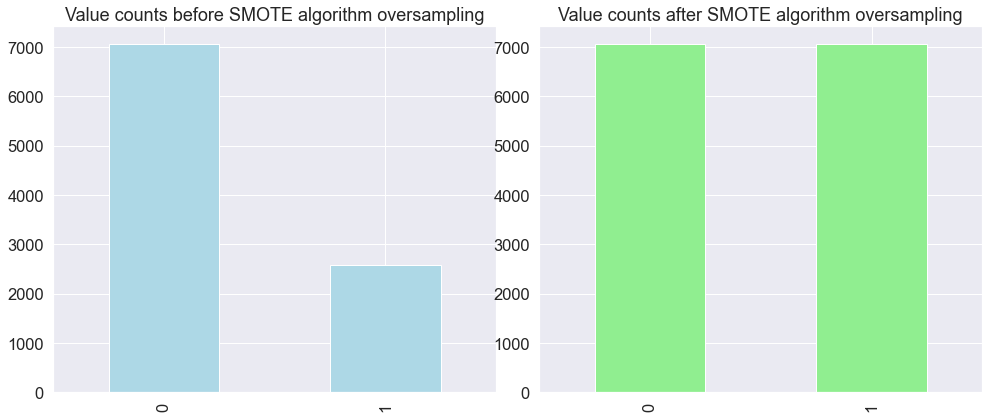

In [625]:
plt.subplot(1,2,1)
y.value_counts().plot(kind = 'bar', 
                      color = ['lightblue'], 
                      title = "Value counts before SMOTE algorithm oversampling",
                      figsize = (14,6))
plt.subplot(1,2,2)
plt.tight_layout()
y_resampled.value_counts().plot(kind = 'bar', color = ['lightgreen'], 
                                title = "Value counts after SMOTE algorithm oversampling")


In [626]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_resampled, # independent variables 
                                                    y_resampled, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set


We'll now test some modeling algorithms and compare their performances on the data. 

In [627]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "SVC":SVC(),
          "DecisionTreeClassifier" : DecisionTreeClassifier(),
          "ExtraTreesClassifier" : ExtraTreesClassifier(),
          "BaggingClassifier" : BaggingClassifier()
         }

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [628]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.6854210898796886,
 'Logistic Regression': 0.5980184005661713,
 'Random Forest': 0.8581033262561925,
 'SVC': 0.5951875442321303,
 'DecisionTreeClassifier': 0.7760084925690022,
 'ExtraTreesClassifier': 0.8545647558386412,
 'BaggingClassifier': 0.8372257607926398}

Text(0.5, 1.0, 'Models vs Accuracy')

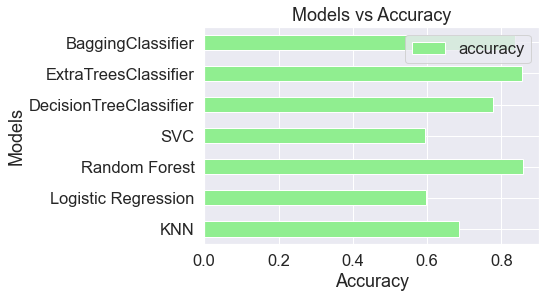

In [659]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.barh(color = ['lightgreen']);
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Models vs Accuracy')

It looks like **Random Forest Classifier** is our best model according to the chart above. *Can we do better?*

# Hyperparameter Tuning

Since `RandomForestClassifier` was our best model, we'll look at a few combinations of the parameters that this modeling function takes. 

In [19]:
n_estimators = [500, 1500, 2500, 5000]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [10, 20, 30, 40, 50]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 5, 10, 15]

We'll now use `RandomizedSearchCV` from `sklearn` that iterates over some of the combinations and returns the best one.

In [23]:
from sklearn.model_selection import RandomizedSearchCV
grid_param = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split, 
    'min_samples_leaf' : min_samples_leaf
}

RFR = RandomForestClassifier(random_state = 1)
RFR_random = RandomizedSearchCV(estimator = RFR, param_distributions = grid_param, n_iter = 500,
                                cv = 5, verbose = 2, random_state = 42, n_jobs = -1)


Calculating the combination with the highest accuracy...

In [24]:
RFR_random.fit(X_train, y_train)
print(RFR_random.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


/Users/sanidhyasitaula/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'n_estimators': 2500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30}


`{'n_estimators': 2500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30}` was our best combination.

In [630]:
clf = RandomForestClassifier(n_estimators=2500, 
                             min_samples_split= 2, 
                             min_samples_leaf= 1, 
                             max_features= 'auto', 
                             max_depth= 30)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.856687898089172

Our current accuracy is **85.6%**.

## Evaluating our Classification Model

### Precision, Recall, F1 Scores

`sklearn`'s `classification_report` can be used to evaluate tools beyond accuracy.

In [631]:
from sklearn.metrics import confusion_matrix, classification_report
Y_preds = clf.predict(X_test)
print(classification_report(y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1429
           1       0.86      0.85      0.85      1397

    accuracy                           0.86      2826
   macro avg       0.86      0.86      0.86      2826
weighted avg       0.86      0.86      0.86      2826



### Confusion Matrix

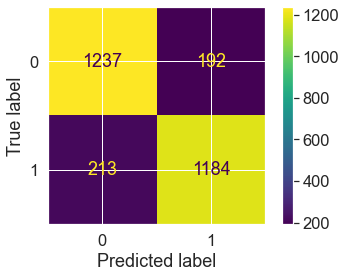

In [632]:
# Import Seaborn
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
sns.set(font_scale=1.5) # Increase font size

plot_confusion_matrix(clf, X_test, y_test, values_format = '.0f')

### Cross-Validated Scores

In [633]:
from sklearn.model_selection import cross_val_score

clf =  RandomForestClassifier()
cv_acc = cross_val_score(clf, X_resampled, y_resampled, cv = 5, scoring = "accuracy")
cv_acc

array([0.69285209, 0.74593064, 0.91082803, 0.92108988, 0.9019816 ])

In [634]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8345364472753009

Our average cross-validated accuracy is **83.45%**.

### ROC Curve and AUC Curves

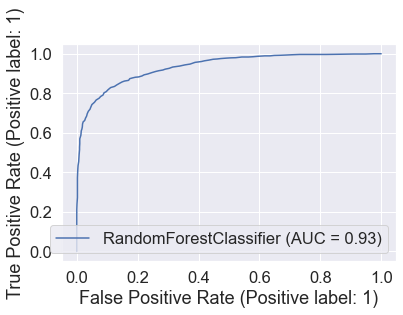

In [635]:
from sklearn.metrics import plot_roc_curve 
%matplotlib inline 
clf.fit(X_train, y_train)
plot_roc_curve(clf, X_test, y_test)

## Feature Importance

In [636]:
clf.feature_importances_

array([0.01130208, 0.05736703, 0.01969122, 0.0445135 , 0.06336339,
       0.00679759, 0.06603068, 0.01071395, 0.01576881, 0.02190321,
       0.05962816, 0.05546888, 0.06360933, 0.04036101, 0.0193647 ,
       0.03832563, 0.00785883, 0.03886482, 0.05254467, 0.04523456,
       0.00675638, 0.01520462, 0.00822133, 0.00999917, 0.01494409,
       0.00697484, 0.00457878, 0.0046988 , 0.01069265, 0.03333078,
       0.01371987, 0.005599  , 0.01376345, 0.02722518, 0.08557898])

Text(0.5, 1.0, 'Columns and Feature Importances')

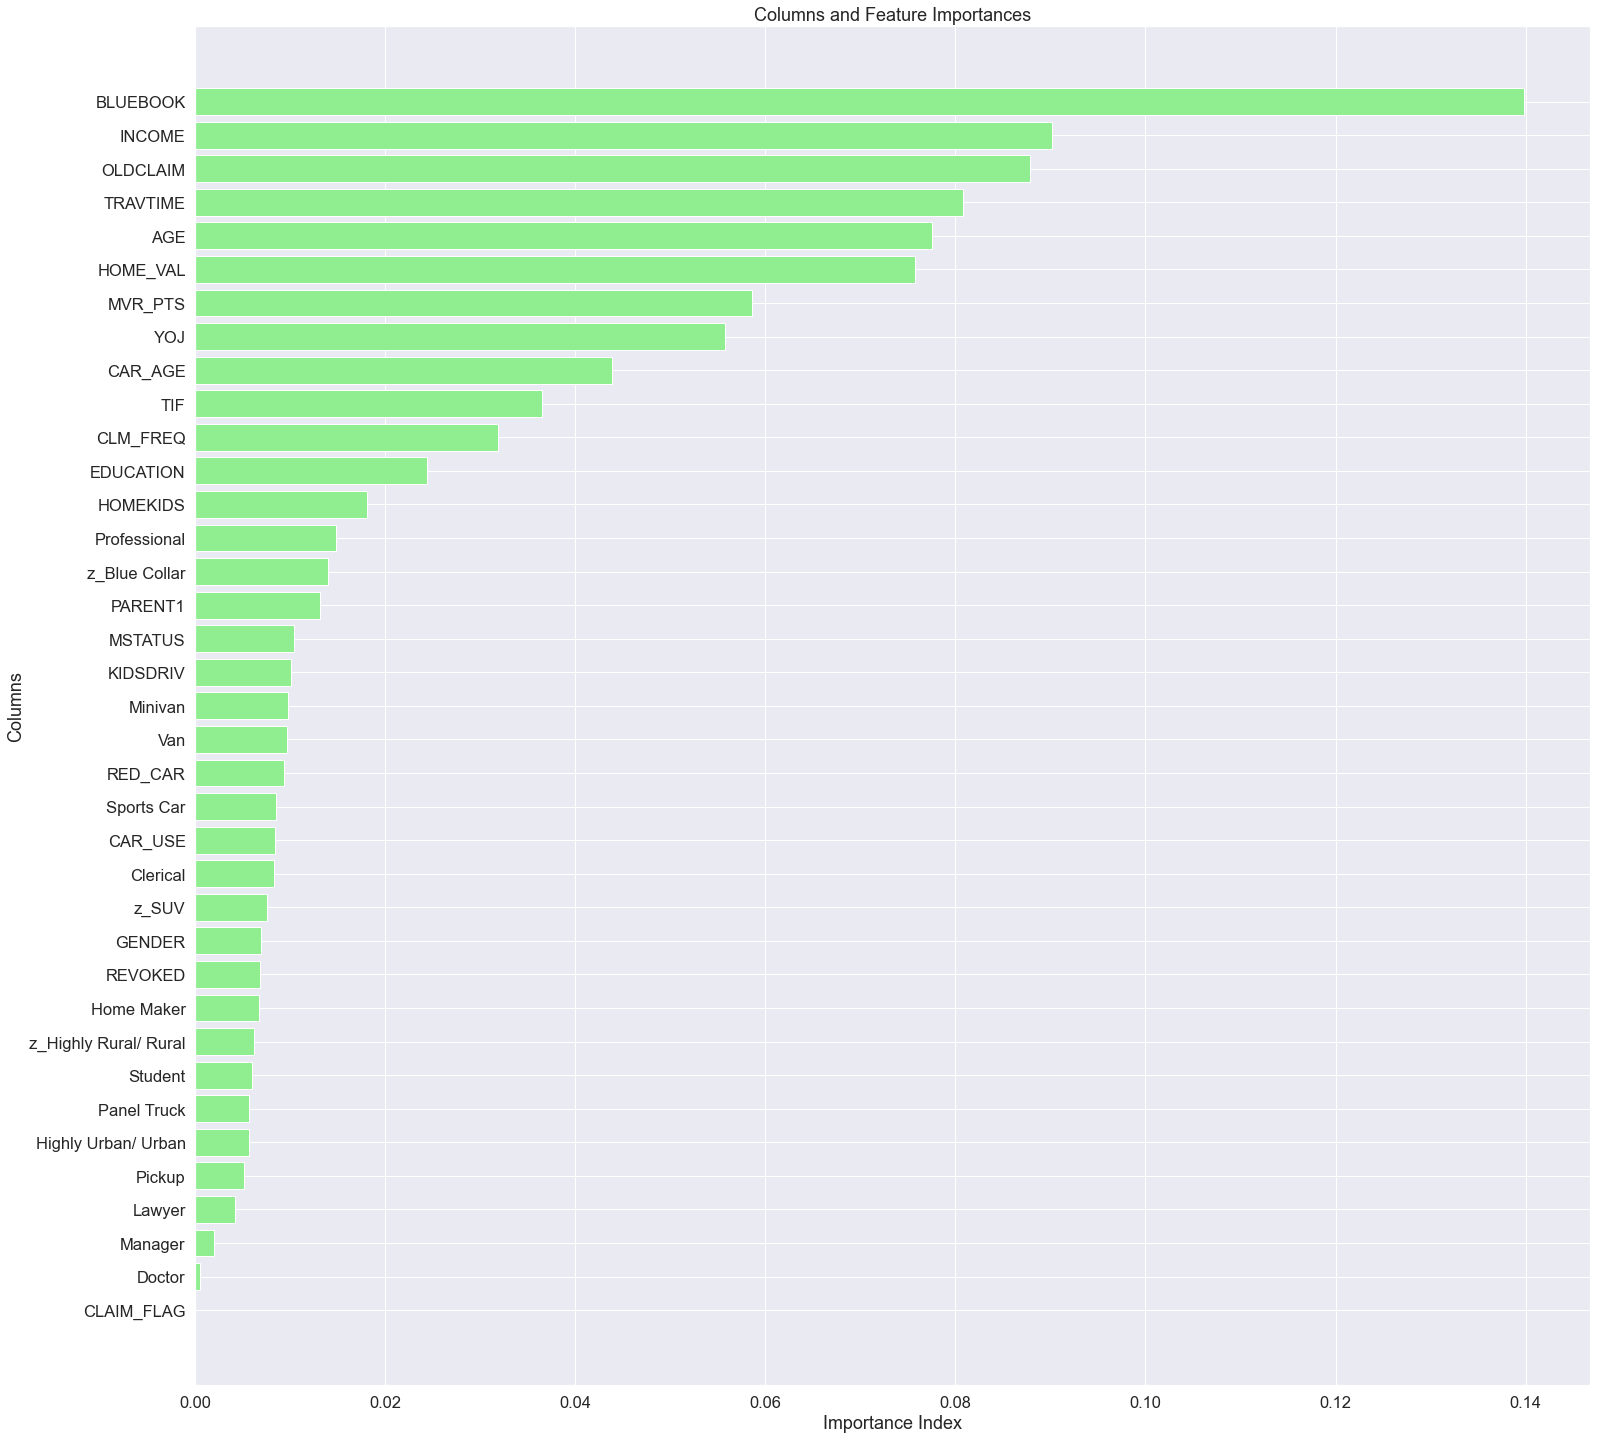

In [658]:
plt.figure(figsize = (25, 25))
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], clf.feature_importances_[sorted_idx], color = ['lightgreen'])
plt.xlabel('Importance Index')
plt.ylabel('Columns')
plt.title('Columns and Feature Importances')

## Reduced Model

Now that we have our feature importances, can we delete the less important features to improve our model?

From our chart above, we can see that the `OCCUPATION` column seems to be less important

In [389]:
df_copy = df_original.drop('OCCUPATION', axis = 1)
df_copy = clean_features(df_copy, features)
df_copy = process_missing(df_copy, missing_entries)
df_copy = process_dates(df_copy)
nominal_features = ['CAR_TYPE','URBANICITY']
df_copy = encode_features(df_copy, ordinal_features, nominal_features)

In [390]:
X = df_copy.drop("CLAIM_FLAG", axis = 1)
X = X.drop("ID", axis = 1)
X = X.drop("CLM_AMT", axis = 1)
X = X.drop("OLDCLAIM", axis = 1)

y = df_copy["CLAIM_FLAG"]

sm = SMOTE(random_state = 42)
X_resampled, y_resampled = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, # independent variables 
                                                    y_resampled, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.6950049619583195,
 'Logistic Regression': 0.5908038372477671,
 'Random Forest': 0.8488256698643731,
 'SVC': 0.5878266622560371,
 'DecisionTreeClassifier': 0.7786966589480648,
 'ExtraTreesClassifier': 0.8488256698643731,
 'BaggingClassifier': 0.8269930532583526}

In [391]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
sorted_idx = clf.feature_importances_.argsort()
columns = [X.columns[index] for index in sorted_idx]
columns
def reduced(df, columns):
    df_copy = df
    for column in columns[:15]:
        print('Dropping ', column, ' and refitting the model..')
        df_copy = df_copy.drop(column, axis = 1)
        X = df_copy.drop('CLAIM_FLAG', axis = 1)
        y = df_copy['CLAIM_FLAG']
        #sm = SMOTE(random_state = 42)
        #X_resampled, y_resampled = sm.fit_resample(X, y)
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, # independent variables 
                                                            y_resampled, # dependent variable
                                                            test_size = 0.2)
        clf_copy = RandomForestClassifier()
        clf_copy.fit(X_train, y_train)
        print('New accuracy is : ', clf_copy.score(X_test, y_test))
        
reduced(df_copy, columns)

Dropping  PARENT1  and refitting the model..
New accuracy is :  0.8329474032418128
Dropping  REVOKED  and refitting the model..
New accuracy is :  0.8441945087661263
Dropping  Sports Car  and refitting the model..
New accuracy is :  0.8418789282170029
Dropping  MSTATUS  and refitting the model..
New accuracy is :  0.8508104531921932
Dropping  KIDSDRIV  and refitting the model..
New accuracy is :  0.8465100893152497
Dropping  Panel Truck  and refitting the model..
New accuracy is :  0.8451869004300364
Dropping  Van  and refitting the model..
New accuracy is :  0.8382401587826662
Dropping  z_SUV  and refitting the model..
New accuracy is :  0.8382401587826662
Dropping  GENDER  and refitting the model..
New accuracy is :  0.8342705921270261
Dropping  Pickup  and refitting the model..
New accuracy is :  0.8504796559708898
Dropping  RED_CAR  and refitting the model..
New accuracy is :  0.842871319880913
Dropping  HOMEKIDS  and refitting the model..
New accuracy is :  0.85742639761826
Droppi

Dropping these less important columns came **without large effect** in the accuracy of our model.

# Modeling for `CLM_AMT`

## Initial Modeling

In [638]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df_copy = df[df['CLAIM_FLAG'] == 1]
X = df_copy.drop('ID', axis = 1)
X = X.drop('CLM_AMT', axis = 1)
y = df_copy["CLM_AMT"]
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set
X_test_original = X_test
y_test_original = y_test

### Feature Scaling

In continuous models, it is important to scale, or more formally, **normalize** our data. Having features on a similar scale can help the gradient descent converge more quickly towards the minima.

`sklearn`'s `MinMaxScaler()` is a good tool to scale our data.

In [660]:
scaler = MinMaxScaler()

In [640]:
X_train = scaler.fit_transform(X_train)
y_train_arr = y_train.values
reshaped_y_train = y_train_arr.reshape(-1, 1)
y_train = scaler.fit_transform(reshaped_y_train)

In [641]:
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
X_test = scaler.fit_transform(X_test)
y_test_arr = y_test.values
reshaped_y_test = y_test_arr.reshape(-1, 1)
y_test = scaler.fit_transform(reshaped_y_test)

<ipython-input-641-caf1d622c8e3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


In [642]:
y_pred = clf.predict(X_test)

## Evaluting our Regression Model

In [643]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.04084140392514863
Mean Squared Error: 0.005504224498151617
Root Mean Squared Error: 0.07419046096467939


Let's look our first five predicted values versus the actual first five values.

In [644]:
s1 = pd.DataFrame({"predicted" : scaler.inverse_transform(y_pred.reshape(-1,1)).flatten(),
                    "actual" : scaler.inverse_transform(y_test).flatten()})
s1.head()

,predicted,actual
0,11209.794948,2908.0
1,5044.058239,3974.0
2,5828.344941,6386.0
3,11334.381771,4431.0
4,5425.925267,3589.0


## Feature Importance

In [645]:
clf.feature_importances_

array([0.00964928, 0.0864292 , 0.02030173, 0.0614262 , 0.08843561,
       0.01054126, 0.0703848 , 0.00950269, 0.00816352, 0.02530768,
       0.0849745 , 0.00814896, 0.1455093 , 0.0330214 , 0.01206303,
       0.07552175, 0.02718039, 0.00658405, 0.05666957, 0.04246508,
       0.        , 0.00784948, 0.00525061, 0.00493098, 0.00855031,
       0.01321673, 0.00829473, 0.0083677 , 0.00049736, 0.00924714,
       0.00441185, 0.00195747, 0.01518528, 0.00546812, 0.01117819,
       0.00717455, 0.00613951])

Text(0.5, 1.0, 'Columns and Feature Importances')

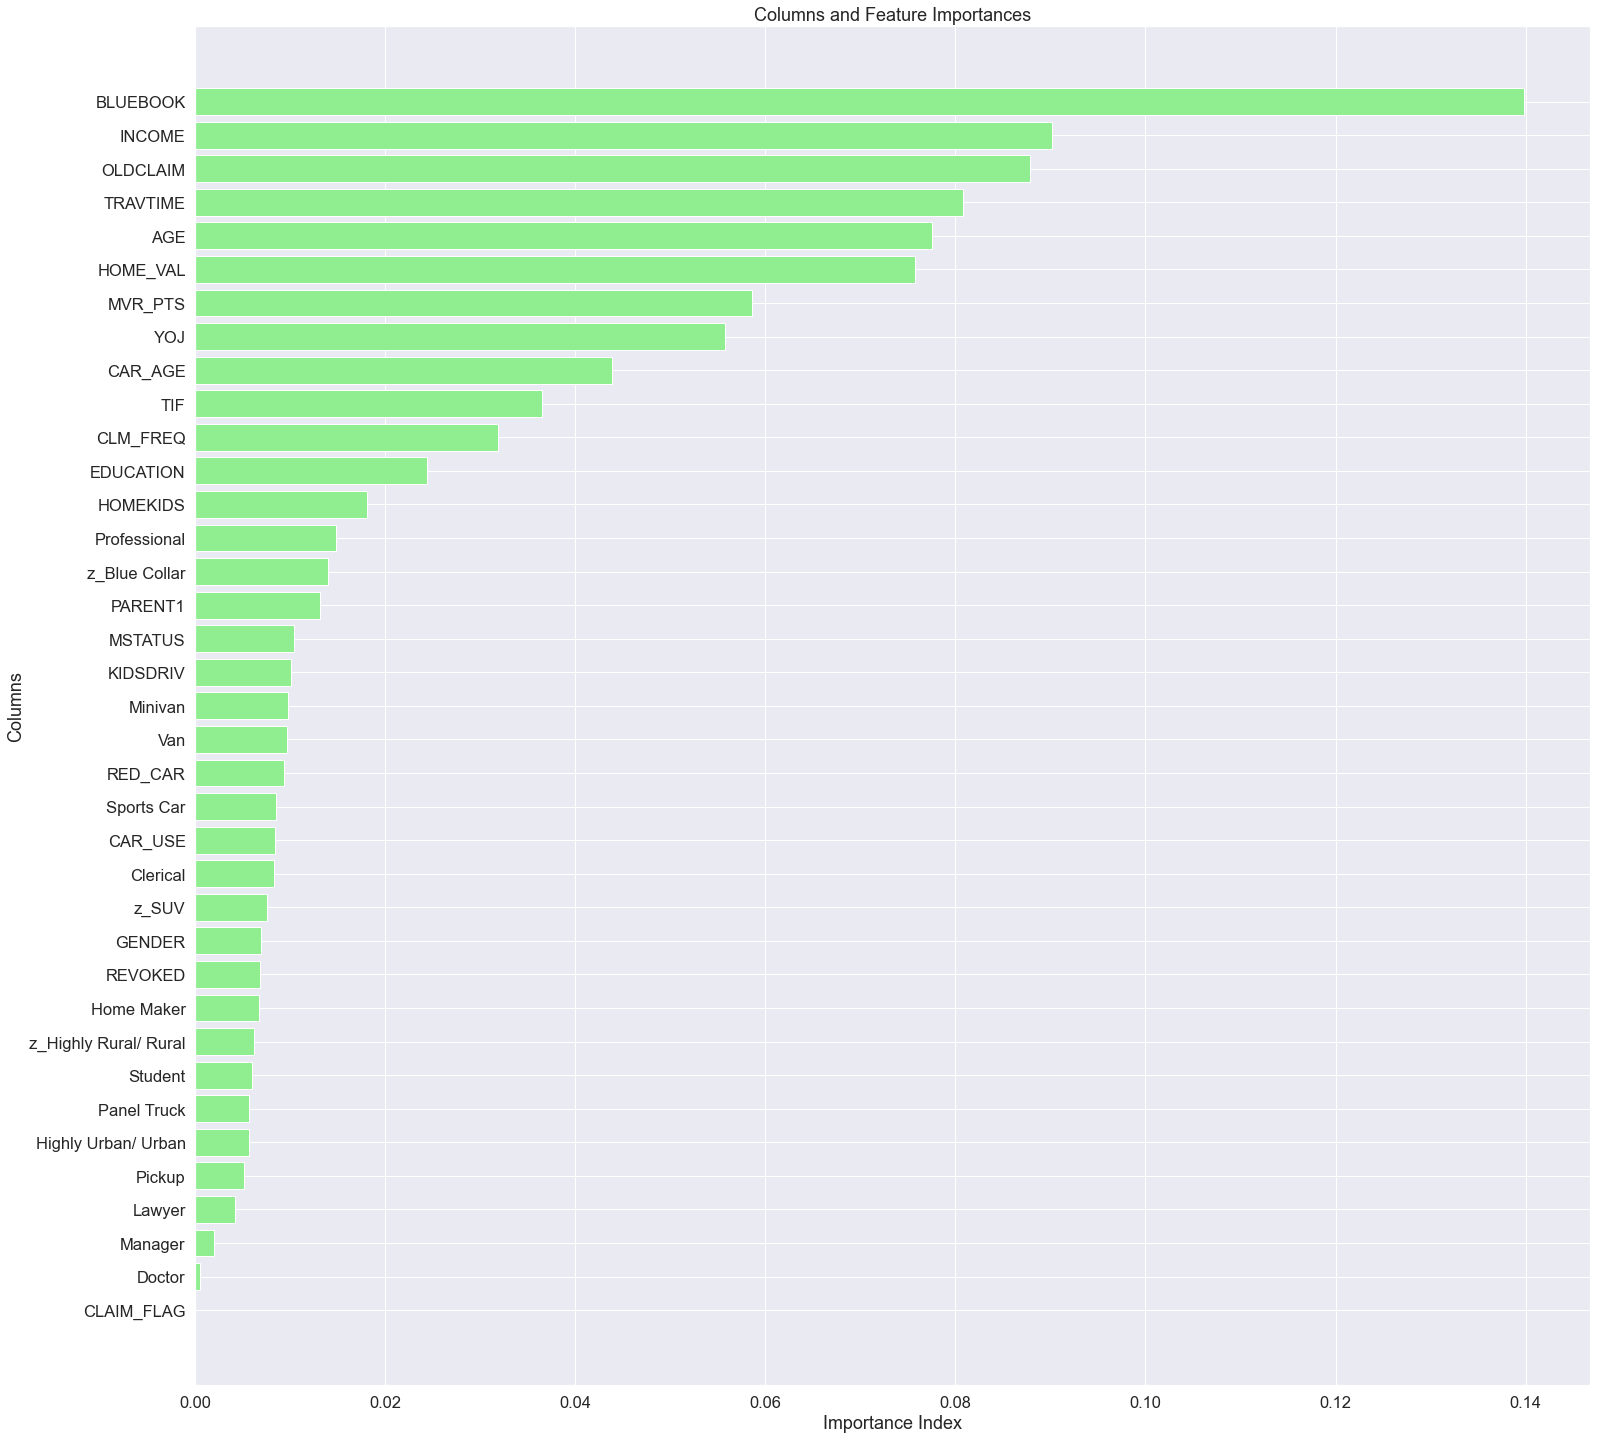

In [657]:
plt.figure(figsize = (25, 25))
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], clf.feature_importances_[sorted_idx], color = ['lightgreen'])
plt.xlabel('Importance Index')
plt.ylabel('Columns')
plt.title('Columns and Feature Importances')

## Reduced Model

In [655]:
import warnings
warnings.filterwarnings('ignore')
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
sorted_idx = clf.feature_importances_.argsort()
columns = [X.columns[index] for index in sorted_idx]
columns
def reduced(df, columns):
    df_copy = df
    for column in columns[:8]:
        print('Dropping ', column, ' and refitting the model..')
        df_copy = df_copy.drop(column, axis = 1)
        X = df_copy.drop('CLM_AMT', axis = 1)
        y = df_copy['CLM_AMT']
        #sm = SMOTE(random_state = 42)
        #X_resampled, y_resampled = sm.fit_resample(X, y)
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, # independent variables 
                                                            y_resampled,
                                                            test_size = 0.2)# dependent variable
                                                            
        X_train = scaler.fit_transform(X_train)
        y_train_arr = y_train.values
        reshaped_y_train = y_train_arr.reshape(-1, 1)
        y_train = scaler.fit_transform(reshaped_y_train)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        X_test = scaler.fit_transform(X_test)
        y_test_arr = y_test.values
        reshaped_y_test = y_test_arr.reshape(-1, 1)
        y_test = scaler.fit_transform(reshaped_y_test)
        y_pred = clf.predict(X_test)
        
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))                                              
reduced(df_copy, columns)

Dropping  CLAIM_FLAG  and refitting the model..
Root Mean Squared Error: 0.3619840448013268
Dropping  Doctor  and refitting the model..
Root Mean Squared Error: 0.36130337306553756
Dropping  Manager  and refitting the model..
Root Mean Squared Error: 0.35870027624909184
Dropping  Lawyer  and refitting the model..
Root Mean Squared Error: 0.3541614399514414
Dropping  Pickup  and refitting the model..
Root Mean Squared Error: 0.3541072823949716
Dropping  Highly Urban/ Urban  and refitting the model..
Root Mean Squared Error: 0.3608386472789943
Dropping  Panel Truck  and refitting the model..
Root Mean Squared Error: 0.3491327846889443
Dropping  Student  and refitting the model..
Root Mean Squared Error: 0.35681654489265135


Again, **not much difference** with a reduced model.

# Summary

For both our variables -- continuous and categorical -- RandomForest proved to be the most accurate modeling algorithm. While we did figure out the most important features both these models, removing the less-important models did not prove to bring much difference in the accuracy of our models.

# Live Representation of the models 

The models are live in the webpage https://predictinsurance.herokuapp.com/. 

The live representation only contains the most important features as input fields, because it is quite inconvinient for a user to enter 23 fields in a webpage.

Do check it out!